In [20]:
import pandas as pd
import json

In [21]:
df=pd.read_csv("museum_users.csv")

In [22]:
df_name_prog= df[['name','progress']].dropna()
df_name_prog['progress'] = df_name_prog.progress.apply(json.loads).values.tolist()

In [23]:
def find_name_id_key(key, df_name_prog):
    names=[]
    keys=[]
    ids=[]
    for i in df_name_prog.index:
        for a in df_name_prog['progress'][i]:
            for k, v in a.items():
                if k == key:
                    names.append(df_name_prog['name'][i])
                    ids.append(a['ID'])
                    keys.append(v)  
    df_tmp = pd.DataFrame(list(zip(names, ids,keys)),columns =['name','id', key])
    df_tmp[key] = df_tmp[key].astype(float)
    return df_tmp

In [24]:
df_tmp=find_name_id_key('time', df_name_prog)

In [25]:
sum_per_user=df_tmp.groupby(['name']).sum()

In [26]:
mean_per_user=df_tmp.groupby(['name']).mean()

In [27]:
sum_per_id=df_tmp.groupby(['id']).sum()

In [28]:
mean_per_id=df_tmp.groupby(['id']).mean()

In [29]:
def find_animals(df_name_prog):
    names_animals=[]
    scores=[]

    for i in df_name_prog.index:
        for a in df_name_prog['progress'][i]:
            for k, v in a.items():
                if k != 'ID' and  k != 'time':
                    names_animals.append(k)
                    scores.append(v)
    df_tmp1 = pd.DataFrame(list(zip(names_animals, scores)),columns =['name_animal','score'])
    df_tmp1['score'] = df_tmp1['score'].astype(int)
    return df_tmp1

In [30]:
df_tmp_animals=find_animals( df_name_prog)

In [31]:
sum_per_animals=df_tmp_animals.groupby(['name_animal']).sum()

In [32]:
mean_per_animals=df_tmp_animals.groupby(['name_animal']).mean()

# Grafici

## Ripartizione dei punteggi 

> Nel seguente grafico a torta viene mostrata la divisione dei punteggi nelle varie categorie (orso,giraffa,volpe,ecc...)

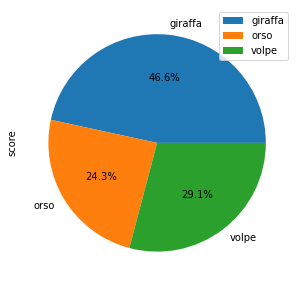

In [33]:
score_pie = mean_per_animals.plot.pie(y='score', figsize=(5, 5), autopct='%1.1f%%')

##  Tempo impiegato nelle stanze


>Nel seguente grafico a torta viene mostrato quanto tempo viene impiegato (in percentuale) in ciascun gioco rispetto al tempo di gioco totale


<AxesSubplot:ylabel='time'>

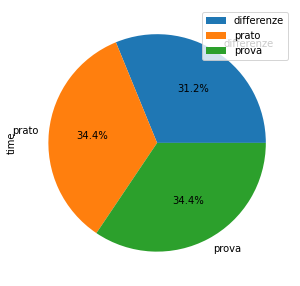

In [34]:
mean_per_id.plot.pie(y='time', figsize=(5, 5), autopct='%1.1f%%')

## Boxplot dei tempi per gioco

> Questo diagramma è una rappresentazione grafica utilizzata per descrivere la distribuzione di un campione tramite indici di dispersione e di posizione. Il rettangolo, diviso in due parti da cui escono due segmenti, è delimitato dal primo e dal terzo quartile, q1/4 e q3/4, e diviso al suo interno dalla mediana, q1/2. I segmenti sono delimitati dal minimo e dal massimo dei valori ( outliers, i punti separati, esclusi). In questo caso sono stati raggruppati i tempi impiegati all'interno di ogni stanza.  

<AxesSubplot:title={'center':'time'}, xlabel='id'>

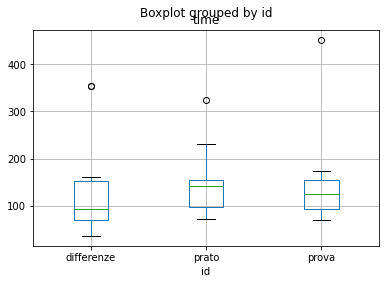

In [35]:
df_tmp.boxplot("time", by="id")

## Boxplot del tempo per utente

> In questo diagramma viene rappresentata graficamente la distribuzione dei tempoi di un dato utente. Può essere modificato a piacimento sostituendo il nome nel blocco seguente ( nell'esempio "carlo").

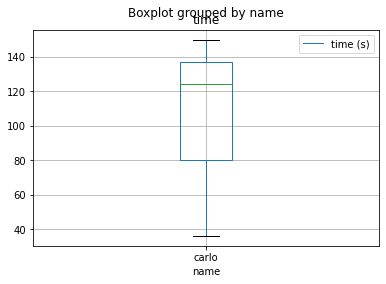

In [36]:
box = df_tmp[df_tmp.name=="carlo"].boxplot("time", by="name")
box.legend(["time (s)"]);

## Tempi totali degli utenti

> È un grafico, che presenta dati quantitativi, a barre orizzontali  di lunghezza proporzionale ai valori che rappresentano. In questo caso sono indicati i tempi per svolgere tutti i giochi divisi per utente. 

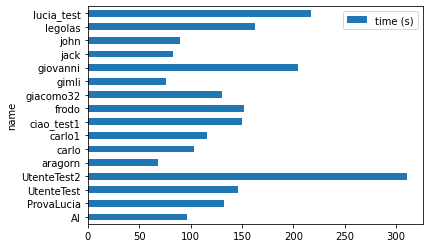

In [37]:
mean = mean_per_user.plot.barh()
mean.legend(["time (s)"]);